<h1>Trabalho final de Data Science</h1>
<h3>Grupo: Alexander Cristian, Rafael Paiva e Ronan Castro </h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Lembrar de adicionar os arquivos na pasta "/Data Science" do seu drive:[Link](https://drive.google.com/drive/folders/1S28dhoI8h5Xj5GCi_lUXaX2cClV2eE3z?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


<h1>Análise dos Microdados do ENEM2019 </h1>
<h3>Dados referentes à Minas Gerais, trocar os caminhos com os arquivos do link:
  https://drive.google.com/drive/folders/1S28dhoI8h5Xj5GCi_lUXaX2cClV2eE3z</h3>

In [ ]:
dfs = pd.read_csv("/content/gdrive/MyDrive/Data Science/MICRODADOS_ENEM_2019_MG.csv", encoding='UTF-8' )    #Arquivo referente aos microdados do ENEM2019 do estado de Minas Gerais.
prova = pd.read_csv("/content/gdrive/MyDrive/Data Science/ITENS_PROVA_2019.csv", encoding='UTF-8' ,sep=';') #Arquivo referente aos dados das provas do ENEM2019 .
hab_mat = pd.read_csv('/content/gdrive/MyDrive/Data Science/HABILIDADE_MAT.csv', header = None,sep=';')     #Arquivo que contém as descrições das habilidades da prova de matemática.

Para entender mais sober os dados visite: https://docs.google.com/spreadsheets/d/1TwOLgWxz7aDPs64U9H-UyUMtT48cTy4M04bNRk0WsUs/edit?usp=sharing

In [ ]:
dfs.sample(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
184272,190002602586,2019,3106200,Belo Horizonte,31,MG,24.0,M,1,3,1,3106200.0,Belo Horizonte,31.0,MG,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DCACEEBCCBABADBDBACDBEEAACBEDCEAADCBEBDBAEEDB,EBBDD99999CAEBCDEEEBECDDDADEDECDDCACAAEDAECBCC...,EEEADBCBABCBABBACEDEDEADCBAECEBCEABEBBECCBBAA,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,140.0,120.0,120.0,180.0,680.0,H,C,C,B,5,K,A,B,C,B,A,B,A,B,B,A,A,B,C,B,B,E,A,D,B
524338,190005773232,2019,3164704,São Sebastião do Paraíso,31,MG,18.0,M,1,1,1,3164704.0,São Sebastião do Paraíso,31.0,MG,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,D,D,E,3,N,D,E,D,C,A,C,B,B,A,B,A,B,E,B,B,E,B,D,B
165680,190002384197,2019,3154606,Ribeirão das Neves,31,MG,31.0,F,2,2,1,3154606.0,Ribeirão das Neves,31.0,MG,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CBABCADDCBDAAAACBDAAEEEACBADDEACCBECEAEABBCCE,99999ECBACEBBCBDEACECCDBDAAACACEBEABCDACBABBBA...,DABAABEAADCCADCBCDACEEBCCCBBAABDECBCEECABDAAB,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,120.0,140.0,620.0,B,B,B,B,3,E,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B
44174,190001280175,2019,3136702,Juiz de Fora,31,MG,17.0,F,1,1,1,3136702.0,Juiz de Fora,31.0,MG,2,0,3,1.0,0,31074098.0,3136702.0,Juiz de Fora,31.0,MG,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,CBAEEDEBCEEEBCBADCBAEDBCBADAEACDBAABCECABCCBC,BBEDA99999CCABAEBCECCADCEEDBBBDDEBBACDBAECEECA...,BEDEAEAADDCBABCBADEACECADDEAECBBECEDCBABCACAC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,180.0,200.0,200.0,200.0,940.0,F,F,E,E,4,Q,D,E,E,C,A,C,D,B,B,B,B,B,E,B,B,E,B,C,B
181300,190002602741,2019,3169307,Três Corações,31,MG,20.0,M,1,1,1,3169307.0,Três Corações,31.0,MG,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADCACDAACECEBDDEDCEABDECACABBECA*AABAABECEDBE,BBAAC99999CCBDCCDECCCEECABABBEEAEBADAEDBCCEBCA...,AAAECBCBDCCCABADCEEEDCCDADBDCADEBCDECBBDEBACA,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,40.0,40.0,100.0,0.0,280.0,E,D,C,F,5,G,A,C,D,B,A,B,A,B,A,B,A,B,B,A,A,E,A,B,B
197168,190002626580,2019,3135456,Jenipapo de Minas,31,MG,29.0,M,2,3,1,3135456.0,Jenipapo de Minas,31.0,MG,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EEACAEDBADBBCBABCBADCAAABCBEABBACECADADEBAACB,99999DCABBADCCBCDBAECDDDBAAAECDDCCDCAEBEBAEECD...,DDDCAECBADBACBDECECBBDEBDBCEEDABCACABEDBEACCE


Abaixo estamos selecionando apenas os alunos inscritos no enem que não são treineiros e tiveram presença em todas as provas

In [ ]:
df = dfs.loc[dfs['IN_TREINEIRO']==0] #Retira todos os treineiros da base
df = df.loc[df['TP_PRESENCA_CN']==1] #Retira todos que não fizeram a prova de Ciências da Natureza 
df = df.loc[df['TP_PRESENCA_CH']==1] #Retira todos que não fizeram a prova de Ciências Humanas 
df = df.loc[df['TP_PRESENCA_LC']==1] #Retira todos que não fizeram a prova de Linguagens e Códigos
df = df.loc[df['TP_PRESENCA_MT']==1] #Retira todos que não fizeram a prova de Matemática

# A renda dos participantes influencia na nota?

<h3>Análise relacionando fatores com a faixa de renda dos inscritos </h3>

<h4>A faixa de renda é a seguinte: </h4>

<table>
    <tr> <th> Letra </th> <th> Renda mensal da família </th></tr>    
    <tr> <td> A </td> <td> Nenhuma renda.</td></tr>
    <tr> <td> B </td> <td> Até R$ 998,00.</td></tr>
    <tr> <td> C </td> <td> De R$ 998,01 até R$ 1.497,00.</td></tr>
    <tr> <td> D </td> <td> De R$ 1.497,01 até R$ 1.996,00.</td></tr>
    <tr> <td> E </td> <td> De R$ 1.996,01 até R$ 2.495,00.</td></tr>
    <tr> <td> F </td> <td> De R$ 2.495,01 até R$ 2.994,00.</td></tr>
    <tr> <td> G </td> <td> De R$ 2.994,01 até R$ 3.992,00.</td></tr>
    <tr> <td> H </td> <td> De R$ 3.992,01 até R$ 4.990,00.</td></tr>
    <tr> <td> I </td> <td> De R$ 4.990,01 até R$ 5.988,00.</td></tr>
    <tr> <td> J </td> <td> De R$ 5.988,01 até R$ 6.986,00.</td></tr>
    <tr> <td> K </td> <td> De R$ 6.986,01 até R$ 7.984,00.</td></tr>
    <tr> <td> L </td> <td> De R$ 7.984,01 até R$ 8.982,00.</td></tr>
    <tr> <td> M </td> <td> De R$ 8.982,01 até R$ 9.980,00.</td></tr>
    <tr> <td> N </td> <td> De R$ 9.980,01 até R$ 11.976,00.</td></tr>
    <tr> <td> O </td> <td> De R$ 11.976,01 até R$ 14.970,00.</td></tr>
    <tr> <td> P </td> <td> De R$ 14.970,01 até R$ 19.960,00.</td></tr>
    <tr> <td> Q </td> <td> Mais de R$ 19.960,00.</td></tr>
</table>

<h4>Média da nota por renda famíliar na prova de Ciências da natureza</h4>

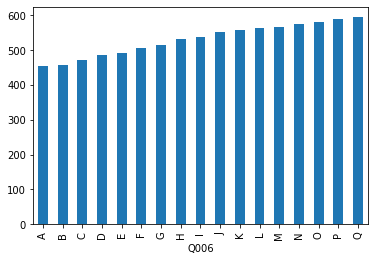

In [ ]:
df.groupby('Q006')['NU_NOTA_CN'].mean().plot(kind="bar")

<h4>Média da nota por renda famíliar na prova de Ciências humanas</h4>

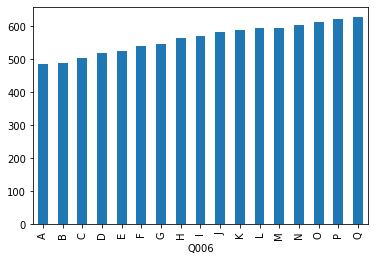

In [ ]:
df.groupby('Q006')['NU_NOTA_CH'].mean().plot(kind='bar')

<h4>Média da nota por renda famíliar na prova de Linguagens e Códigos</h4>

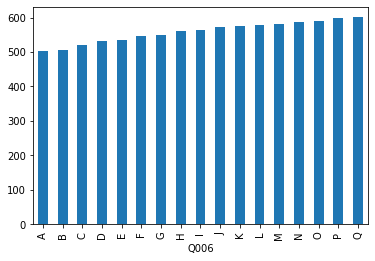

In [ ]:
df.groupby('Q006')['NU_NOTA_LC'].mean().plot(kind='bar')

<h4>Média da nota por renda famíliar na prova de Matemática</h4>

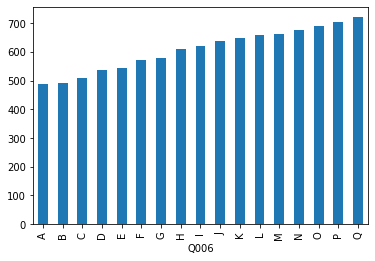

In [ ]:
df.groupby('Q006')['NU_NOTA_MT'].mean().plot(kind="bar")

<h4>Média da nota por renda famíliar na redação</h4>

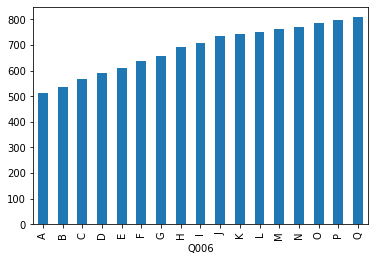

In [ ]:
df.groupby('Q006')['NU_NOTA_REDACAO'].mean().plot(kind='bar')

# Quais outros fatores a renda influencia?

<h3>Análise de faltantes </h3>
<h4>Abaixo passo os dados de quantas pessoas tem em cada pessoa para uma </h4>

In [ ]:
df_p = dfs[dfs['TP_PRESENCA_LC']==0]
df_p = df_p[df_p['IN_TREINEIRO']==0]

In [ ]:
faltantes = df_p.groupby('Q006')['TP_PRESENCA_LC'].count().tolist()
inscritos = dfs.groupby('Q006')['NU_INSCRICAO'].count().tolist()

In [ ]:
porcentagens_faltas = []
for i in range(len(inscritos)):
    porcentagens_faltas.append(((faltantes[i]*100) / inscritos[i]))

<BarContainer object of 17 artists>

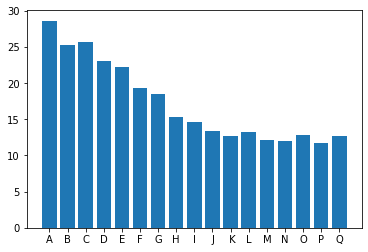

In [ ]:
plt.bar(['A','B','C','D','E','F','G','H','I','J',' K','L','M','N','O','P','Q'],porcentagens_faltas)

In [ ]:
porcentagens_faltas

[28.62406899255194,
 25.294616666155623,
 25.629493243005825,
 23.037566914586197,
 22.27661581498227,
 19.3029215786776,
 18.471257424745797,
 15.357512953367875,
 14.612646211222241,
 13.419098420667295,
 12.705445190796055,
 13.276676109537298,
 12.158231529959279,
 11.92992213570634,
 12.797516384960332,
 11.743315508021391,
 12.653562653562654]

# Escolas Particulares x Públicas, quais habilidades são mais erradas pelo ensino publico?

<h3> Motivação para a questão abaixo sendo: </h3>
<table>
    <tr> <th> Número </th> <th> Qual o tipo de escola </th></tr>    
    <tr> <td> 1 </td> <td> Não respondeu.</td></tr>
    <tr> <td> 2 </td> <td> Escola Pública. </td></tr>
    <tr> <td> 3 </td> <td> Escola Particular.</td></tr>

</table>
---



In [ ]:
notas_pubxpar = df[df['TP_PRESENCA_MT']==1]
notas_pubxpar.groupby('TP_ESCOLA')['NU_NOTA_MT'].mean()

TP_ESCOLA
1    544.826361
2    525.705337
3    666.341280
Name: NU_NOTA_MT, dtype: float64

<h3> Análise da diferença dos acertos nas provas em relações as habildades</h3>
<h4> Existem habilidades que possuem um desvio mt grande da média quando se difere o tipo de escola se é pública ou não</h4>

In [ ]:
num_prova = [515,516,517,518] #Códigos das 4 diferentes cores de cadernos de matemática do ENEM 2019
prova = prova[prova['CO_PROVA'].notnull()] 
frames = []
errosPub = []
#Para cada cor de caderno:
for num in num_prova:
  #Seleciona a prova que tem o código igual à cor que está iterando
  analise_questoes = df[df['CO_PROVA_MT']==num]
  analise_questoes = analise_questoes[analise_questoes['TP_ESCOLA']==2] #Seleciona só escolas públicas
  analise_questoes = analise_questoes[analise_questoes['TP_PRESENCA_MT']==1] #Seleciona só quem esteve presente na prova de matemática
  analise_questoes = analise_questoes[analise_questoes['IN_TREINEIRO']==0] #Remove todos os treineiros da base

  #Passa as respostas de todas as pessoas para uma lista, gerando para cada inscrito uma lista dentro dessa lista questoes_marcadas com todos os resultados
  questoes_marcadas = analise_questoes['TX_RESPOSTAS_MT'].tolist() 

  questoes_gabarito_tmp = analise_questoes['TX_GABARITO_MT'].tolist()
  questoes_gabarito = questoes_gabarito_tmp[0] #questoes_gabarito é uma lista que recebe o gabarito do caderno da cor selecionada

 #inicia uma matriz de nxm sendo n = tamanho de inscritos que fizeram o caderno que estamos iterando
 # m = quantidade de questões na prova = 45 (Sempre constante).
  vetorErros = np.zeros(((len(questoes_marcadas)),45),dtype=np.int64)

#Para cada inscrito:
  for alunos in range(len(questoes_marcadas)):
    #Para cada questão:
    for i in range(45):
      #Se o aulo acertou, na matriz de erros ele adiciona um 1 para cada erro no index = questão errada
      if (questoes_marcadas[alunos][i] != questoes_gabarito[i] ):
        vetorErros[alunos][i] += 1
  errosPub.append(vetorErros)
  #Então vE recebe a média de erros (soma de todos os erros / todos que fizeram a questão)
  vE = np.true_divide(vetorErros.sum(axis=0), len(questoes_marcadas))

  #prova_mat recebe um vetor com as informações das provas para cruzar dados de habilidade de questão com a porcentagem de erros.
  prova_mat = prova[prova['CO_PROVA'].notnull()] 
  prova_mat = prova_mat[prova_mat['CO_PROVA']==num]
  prova_mat['PORCENTAGEM_ERRO_PUBLICA'] = vE
  frames.append(prova_mat)

#Guardamos então os dados para todas as questões no dataframe resultPublica
resultPublica = pd.concat(frames)


#O código abaixo é o mesmo do de cima, só muda quando seleciona o 'TP_ESCOLA'== 3 (Escolas Particulares)
num_prova = [515,516,517,518]
prova = prova[prova['CO_PROVA'].notnull()] 
frames = []
errosPart = []
for num in num_prova:
  analise_questoes = df[df['CO_PROVA_MT']==num]
  analise_questoes = analise_questoes[analise_questoes['TP_ESCOLA']==3]
  analise_questoes = analise_questoes[analise_questoes['TP_PRESENCA_MT']==1]
  analise_questoes = analise_questoes[analise_questoes['IN_TREINEIRO']==0]

  questoes_marcadas = analise_questoes['TX_RESPOSTAS_MT'].tolist()

  questoes_gabarito_tmp = analise_questoes['TX_GABARITO_MT'].tolist()
  questoes_gabarito = questoes_gabarito_tmp[0]

  vetorErros = np.zeros(((len(questoes_marcadas)),45),dtype=np.int64)

  for alunos in range(len(questoes_marcadas)):
    for i in range(45):
      if (questoes_marcadas[alunos][i] != questoes_gabarito[i] ):
        vetorErros[alunos][i] += 1
  errosPart.append(vetorErros)
  vE = np.true_divide(vetorErros.sum(axis=0), len(questoes_marcadas))
  prova_mat = prova[prova['CO_PROVA'].notnull()] 
  prova_mat = prova_mat[prova_mat['CO_PROVA']==num]
  prova_mat['PORCENTAGEM_ERRO_PRIVADA'] = vE
  frames.append(prova_mat)


resultPrivada = pd.concat(frames)

In [ ]:
somaPub = 0
somaPart = 0
for i in errosPub:
  somaPub += sum(i)
for i in errosPart:
  somaPart += sum(i)

lenTotalPub = (len(errosPub[0])+len(errosPub[1])+len(errosPub[2])+len(errosPub[3]))
lenTotalPart = (len(errosPart[0])+len(errosPart[1])+len(errosPart[2])+len(errosPart[3]))

print('Público : ', sum(somaPub)/lenTotalPub)
print('Particular : ', sum(somaPart)/lenTotalPart)

Público :  33.54333737187254
Particular :  25.773786169691025


In [ ]:
#Criando um novo dataframe pubxparticular para armazenar os dados que acabamos de obter
pubxparticular = pd.DataFrame(columns = ['Porcentagem de Erros Escola Pública', 'Porcentagem de Erros Escola Particular'])
pubxparticular['Porcentagem de Erros Escola Pública'] = resultPublica.groupby('CO_HABILIDADE')['PORCENTAGEM_ERRO_PUBLICA'].mean()
pubxparticular['Porcentagem de Erros Escola Particular'] = resultPrivada.groupby('CO_HABILIDADE')['PORCENTAGEM_ERRO_PRIVADA'].mean()
pubxparticular['Descrição da habilidade'] = hab_mat[0]
percentErrosGerais = pubxparticular
pubxparticular['Diferença entre Escola Pública e Particular'] = pubxparticular['Porcentagem de Erros Escola Pública'] - pubxparticular['Porcentagem de Erros Escola Particular']

In [ ]:
pubxparticular.sort_values(by ='Diferença entre Escola Pública e Particular', ascending=False)

,Porcentagem de Erros Escola Pública,Porcentagem de Erros Escola Particular,Descrição da habilidade,Diferença entre Escola Pública e Particular
CO_HABILIDADE,,,,
15,0.713589,0.363038,Identificar a relação de dependência entre gra...,0.350551
20,0.641134,0.318582,Interpretar gráfico cartesiano que represente ...,0.322552
5,0.821020,0.527047,Avaliar propostas de intervenção na realidade ...,0.293973
9,0.820353,0.559314,Utilizar conhecimentos geométricos de espaço e...,0.261040
24,0.421062,0.182855,Utilizar informações expressas em gráficos ou ...,0.238207
1,0.402592,0.182905,"Reconhecer, no contexto social, diferentes sig...",0.219687
10,0.773389,0.558436,Identificar relações entre grandezas e unidade...,0.214953
6,0.449145,0.237342,Interpretar a localização e a movimentação de ...,0.211803
27,0.798819,0.593838,Analisar informações expressas em gráficos ou ...,0.204981


In [ ]:
percentErrosGerais = percentErrosGerais.rename(columns = {'Diferença entre Escola Pública e Particular': 'Média de Erros dos Alunos'}, inplace = False)
percentErrosGerais['Média de Erros dos Alunos'] = (percentErrosGerais['Porcentagem de Erros Escola Pública'] + percentErrosGerais['Porcentagem de Erros Escola Particular'])/2
percentErrosGerais.sort_values(by ='Média de Erros dos Alunos', ascending=False)

,Porcentagem de Erros Escola Pública,Porcentagem de Erros Escola Particular,Descrição da habilidade,Média de Erros dos Alunos
CO_HABILIDADE,,,,
30,0.872652,0.820229,Avaliar propostas de intervenção na realidade ...,0.846441
7,0.831585,0.760297,Identificar características de figuras planas ...,0.795941
17,0.820248,0.740898,Analisar informações envolvendo a variação de ...,0.780573
14,0.814143,0.740809,Avaliar proposta de intervenção na realidade u...,0.777476
26,0.844160,0.696735,Analisar informações expressas em gráficos ou ...,0.770448
21,0.789962,0.718783,Resolver situação-problema cuja modelagem envo...,0.754372
28,0.829685,0.654340,Resolver situação-problema que envolva conheci...,0.742013
11,0.779894,0.686992,Utilizar a noção de escalas na leitura de repr...,0.733443
8,0.798242,0.635979,Resolver situação-problema que envolva conheci...,0.717111


<h3> Descrições completas das habilidades</h3>
<h4>Tabela: </h4>
<table>
    <tr> <th> Número da habilidade (CO_HABILIDADE) </th> <th> Descrição da habilidade</th></tr>    
    <tr> <td> 1 </td> <td> Reconhecer, no contexto social, diferentes significados e representações dos números e operações - naturais, inteiros, racionais ou reais. </td></tr>
    <tr> <td> 2 </td> <td>Identificar padrões numéricos ou princípios de contagem.</td></tr>
    <tr> <td> 3 </td> <td> Resolver situação-problema envolvendo conhecimentos numéricos.</td></tr>
    <tr> <td> 4 </td> <td> Avaliar a razoabilidade de um resultado numérico na construção de argumentos sobre afirmações quantitativas.</td></tr>
    <tr> <td> 5 </td> <td> Avaliar propostas de intervenção na realidade utilizando conhecimentos numéricos.</td></tr>
    <tr> <td> 6 </td> <td>Interpretar a localização e a movimentação de pessoas/objetos no espaço tridimensional e sua representação no espaço bidimensional.;
</td></tr>
    <tr> <td> 7 </td> <td> Identificar características de figuras planas ou espaciais.;
</td></tr>
    <tr> <td> 8 </td> <td> Resolver situação-problema que envolva conhecimentos geométricos de espaço e forma.;
</td></tr>
    <tr> <td> 9 </td> <td> Utilizar conhecimentos geométricos de espaço e forma na seleção de argumentos propostos como solução de problemas do cotidiano.;
</td></tr>
    <tr> <td> 10 </td> <td> Identificar relações entre grandezas e unidades de medida.;
</td></tr>
    <tr> <td> 11</td> <td>Utilizar a noção de escalas na leitura de representação de situação do cotidiano.;
</td></tr>
    <tr> <td> 12 </td> <td> Resolver situação-problema que envolva medidas de grandezas.;
</td></tr>
    <tr> <td> 13 </td> <td>Avaliar o resultado de uma medição na construção de um argumento consistente.;
</td></tr>
    <tr> <td> 14 </td> <td> Avaliar proposta de intervenção na realidade utilizando conhecimentos geométricos relacionados a grandezas e medidas.;
</td></tr>
    <tr> <td> 15 </td> <td>Identificar a relação de dependência entre grandezas.;
</td></tr>
    <tr> <td> 16 </td> <td> Resolver situação-problema envolvendo a variação de grandezas, direta ou inversamente proporcionais.;
</td></tr>
    <tr> <td> 17 </td> <td> Analisar informações envolvendo a variação de grandezas como recurso para a construção de argumentação.;
</td></tr>
    <tr> <td> 18 </td> <td> Avaliar propostas de intervenção na realidade envolvendo variação de grandezas.;
</td></tr>
    <tr> <td> 19 </td> <td> Identificar representações algébricas que expressem a relação entre grandezas.;
</td></tr>
    <tr> <td> 20 </td> <td> Interpretar gráfico cartesiano que represente relações entre grandezas.;
</td></tr>
    <tr> <td> 21 </td> <td>Resolver situação-problema cuja modelagem envolva conhecimentos algébricos.;
</td></tr>
    <tr> <td> 22 </td> <td> Utilizar conhecimentos algébricos/geométricos como recurso para a construção de argumentação.;
</td></tr>
    <tr> <td> 23 </td> <td> Avaliar propostas de intervenção na realidade utilizando conhecimentos algébricos.;
</td></tr>
    <tr> <td> 24 </td> <td> Utilizar informações expressas em gráficos ou tabelas para fazer inferências.;
</td></tr>
    <tr> <td> 25 </td> <td> Resolver problema com dados apresentados em tabelas ou gráficos.;
</td></tr>
    <tr> <td> 26 </td> <td> Analisar informações expressas em gráficos ou tabelas como recurso para aconstrução de argumentos.;
</td></tr>
    <tr> <td> 27 </td> <td> Analisar informações expressas em gráficos ou tabelas como recurso para a construção de argumentos.;
</td></tr>
    <tr> <td> 28 </td> <td> Resolver situação-problema que envolva conhecimentos de estatística e probabilidade.;
</td></tr>
    <tr> <td> 29 </td> <td> Utilizar conhecimentos de estatística e probabilidade como recurso para a construção de argumentação;
</td></tr>
    <tr> <td> 30 </td> <td> Avaliar propostas de intervenção na realidade utilizando conhecimentos de estatística e probabilidade.
</td></tr>

</table>


# A escolaridade dos pais influencia nas notas?

<h3> Média de nota geral dos alunos de acordo com a escolaridade paterna/homem responsável</h3>
<h4>Tabela: </h4>
<table>
    <tr> <th> Letra </th> <th> Até que série seu pai, ou o homem responsável por você, estudou? </th></tr>    
    <tr> <td> A </td> <td> Nunca estudou.</td></tr>
    <tr> <td> B </td> <td> Não completou a 4ª série/5º ano do Ensino Fundamental.</td></tr>
    <tr> <td> C </td> <td> Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.</td></tr>
    <tr> <td> D </td> <td> Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.</td></tr>
    <tr> <td> E </td> <td> Completou o Ensino Médio, mas não completou a Faculdade.</td></tr>
    <tr> <td> F </td> <td> Completou a Faculdade, mas não completou a Pós-graduação.</td></tr>
    <tr> <td> G </td> <td> Completou a Pós-graduação.</td></tr>
    <tr> <td> H </td> <td> Não sei.</td></tr>
</table>

<h3>Análise de performance na prova de matemática em relação à escolaridade dos pais  </h3>

In [ ]:
dfC = dfs[dfs['IN_TREINEIRO']==0]
dfC = dfC[dfC['TP_PRESENCA_MT']==1]
dfC = dfC[dfC['TP_PRESENCA_MT']==1]
dfC.groupby('Q001')['NU_NOTA_MT'].mean()

Q001
A    476.708693
B    505.448376
C    528.817420
D    542.445648
E    567.397948
F    630.643461
G    659.660117
H    515.125597
Name: NU_NOTA_MT, dtype: float64

<h3> Média de nota geral dos alunos de acordo com a escolaridade materna/mulher responsável</h3>
<h4>Tabela: </h4>
<table>
    <tr> <th> Letra </th> <th> Até que série sua mãe, ou o mulher responsável por você, estudou? </th></tr>    
    <tr> <td> A </td> <td> Nunca estudou.</td></tr>
    <tr> <td> B </td> <td> Não completou a 4ª série/5º ano do Ensino Fundamental.</td></tr>
    <tr> <td> C </td> <td> Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.</td></tr>
    <tr> <td> D </td> <td> Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.</td></tr>
    <tr> <td> E </td> <td> Completou o Ensino Médio, mas não completou a Faculdade.</td></tr>
    <tr> <td> F </td> <td> Completou a Faculdade, mas não completou a Pós-graduação.</td></tr>
    <tr> <td> G </td> <td> Completou a Pós-graduação.</td></tr>
    <tr> <td> H </td> <td> Não sei.</td></tr>
</table>

In [ ]:
dfC.groupby('Q002')['NU_NOTA_MT'].mean()

Q002
A    469.819432
B    498.698752
C    517.769435
D    528.463559
E    554.323123
F    610.613569
G    627.410237
H    501.308686
Name: NU_NOTA_MT, dtype: float64

# Acesso à tecnologia influencia na nota?

<h3> Média de nota de matemática por computador em casa</h3>
<h4>Tabela: </h4>
<table>
    <tr> <th> Letra </th> <th> Quantos computadores tem em casa </th></tr>    
    <tr> <td> A </td> <td> Nenhum.</td></tr>
    <tr> <td> B </td> <td> Um.</td></tr>
    <tr> <td> C </td> <td> Dois.</td></tr>
    <tr> <td> D </td> <td> Três.</td></tr>
    <tr> <td> E </td> <td> Quatro ou mais.</td></tr>
</table>


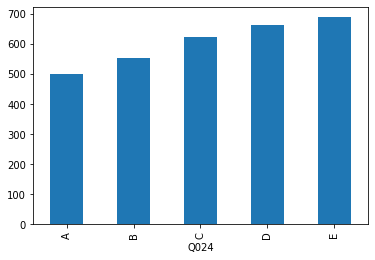

In [ ]:
dfC.groupby('Q024')['NU_NOTA_MT'].mean().plot(kind='bar')

# Qual o participante mais novo? E o mais velho? Qual a média de idade?

Participante mais novo tinha: 11.0
Participante mais velho tinha: 83.0
Média da idade dos participantes era de: 21.965794156702508


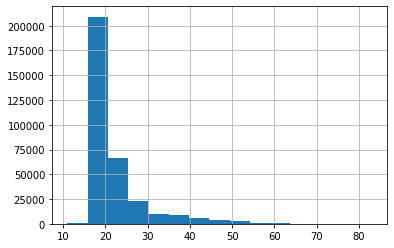

In [ ]:
Nu_Idade = df["NU_IDADE"]
Nu_Idade.hist(bins = 15)
print('Participante mais novo tinha:',Nu_Idade.min())
print('Participante mais velho tinha:',Nu_Idade.max())
print('Média da idade dos participantes era de:',Nu_Idade.mean())

# Qual a porcentagem de gênero entre os participantes?

[60.08081635356854, 39.91918364643146]


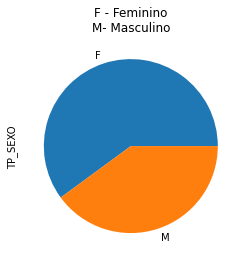

In [ ]:
Generos = df["TP_SEXO"]
distGeneros = Generos.value_counts()
percenteGenero = [(100 * x)/distGeneros.sum() for x in distGeneros]
print(percenteGenero)
distGeneros.plot(kind='pie', title = 'F - Feminino\nM- Masculino')

# Qual a porcentagem de mulheres grávidas?


[99.98045455684466, 0.019545443155336156]


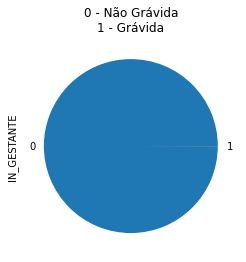

In [ ]:
Mulher = df.loc[df['TP_SEXO']=='F']
Gestantes = Mulher["IN_GESTANTE"]
distInGestante = Gestantes.value_counts()
percenteGestante = [(100 * x)/distInGestante.sum() for x in distInGestante]
print(percenteGestante)
distInGestante.plot(kind='pie', title = '0 - Não Grávida\n1 - Grávida')

# Qual a porcentagem das escolhas entre inglês ou espanhol?

[57.43621861365628, 42.56378138634372]


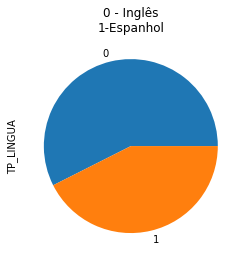

In [ ]:
Linguagem = df["TP_LINGUA"]
distLinguagens = Linguagem.value_counts()
percenteLinguagens = [(100 * x)/distLinguagens.sum() for x in distLinguagens]
print(percenteLinguagens)
distLinguagens.plot(kind='pie', title = '0 - Inglês\n1-Espanhol')

# Qual o impacto na nota causado pela necessidade de se deslocar de uma cidade para outra para fazer a prova?

   Cidades_Diferentes  Mesma_Cidade
0          524.811951    544.312765


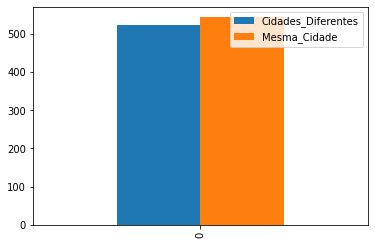

In [ ]:
LocalDif = df.loc[df["NO_MUNICIPIO_RESIDENCIA"] != df["NO_MUNICIPIO_PROVA"]] 
Linguagens = LocalDif["NU_NOTA_LC"]
Matematica = LocalDif["NU_NOTA_MT"]
Humanas = LocalDif["NU_NOTA_CN"]
Ciencias = LocalDif["NU_NOTA_CH"]
Redacao = LocalDif['NU_NOTA_REDACAO']
mediaGeralDif = (Linguagens + Matematica + Humanas + Ciencias + Redacao)/5

MesmoLocal = df.loc[df["NO_MUNICIPIO_RESIDENCIA"] == df["NO_MUNICIPIO_PROVA"]] 

Linguagens = MesmoLocal["NU_NOTA_LC"]
Matematica = MesmoLocal["NU_NOTA_MT"]
Humanas = MesmoLocal["NU_NOTA_CN"]
Ciencias = MesmoLocal["NU_NOTA_CH"]
Redacao = MesmoLocal['NU_NOTA_REDACAO']
mediaGeralLocal = (Linguagens + Matematica + Humanas + Ciencias +  Redacao)/5
lst = [[mediaGeralDif.mean(), mediaGeralLocal.mean()]]

comparacao = pd.DataFrame(lst, columns = ['Cidades_Diferentes', 'Mesma_Cidade'])
comparacao.plot(kind = 'bar')
print(comparacao)



# Ranking




In [ ]:
num_prova = [515] #Códigos das 4 diferentes cores de cadernos de matemática do ENEM 2019
prova = prova[prova['CO_PROVA'].notnull()] 
frames = []
#Para cada cor de caderno:
for num in num_prova:
  #Seleciona a prova que tem o código igual à cor que está iterando
  analise_questoes = df[df['CO_PROVA_MT']==num]
  analise_questoes = analise_questoes[analise_questoes['TP_PRESENCA_MT']==1] #Seleciona só quem esteve presente na prova de matemática
  analise_questoes = analise_questoes[analise_questoes['IN_TREINEIRO']==0] #Remove todos os treineiros da base

  #Passa as respostas de todas as pessoas para uma lista, gerando para cada inscrito uma lista dentro dessa lista questoes_marcadas com todos os resultados
  questoes_marcadas = analise_questoes['TX_RESPOSTAS_MT'].tolist()
  notas_alunos = analise_questoes['NU_NOTA_MT'].tolist()
  
  questoes_gabarito_tmp = analise_questoes['TX_GABARITO_MT'].tolist()
  questoes_gabarito = questoes_gabarito_tmp[0] #questoes_gabarito é uma lista que recebe o gabarito do caderno da cor selecionada

 #inicia uma matriz de nxm sendo n = tamanho de inscritos que fizeram o caderno que estamos iterando
 # m = quantidade de questões na prova = 45 (Sempre constante).
  vetorAcertos = np.zeros(((len(questoes_marcadas)),45),dtype=np.int64)

#Para cada inscrito:
  for alunos in range(len(questoes_marcadas)):
    #Para cada questão:
    for i in range(45):
      #Se o aulo acertou, na matriz de erros ele adiciona um 1 para cada erro no index = questão errada
      if (questoes_marcadas[alunos][i] == questoes_gabarito[i] ):
        vetorAcertos[alunos][i] += 1



print(vetorAcertos,notas_alunos)

[[1 0 0 ... 0 1 0]
 [1 0 1 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 0 0]] [397.5, 698.7, 469.2, 413.7, 449.0, 720.5, 664.3, 478.9, 508.4, 678.6, 580.8, 709.9, 619.6, 424.7, 666.0, 470.7, 375.5, 651.0, 576.6, 562.7, 500.2, 627.7, 518.2, 612.7, 666.4, 622.8, 455.2, 591.2, 623.2, 738.8, 803.6, 606.7, 459.7, 494.2, 727.2, 453.6, 546.0, 552.1, 575.6, 513.5, 449.2, 419.9, 605.0, 482.4, 692.7, 648.2, 435.6, 682.5, 549.5, 746.8, 470.7, 493.6, 417.6, 615.7, 408.8, 677.2, 708.7, 392.0, 463.3, 593.3, 527.7, 554.9, 526.4, 771.1, 423.0, 493.2, 464.4, 597.6, 646.3, 407.8, 453.6, 649.7, 541.9, 529.9, 427.7, 634.0, 533.5, 639.2, 428.5, 704.8, 513.9, 688.4, 514.4, 572.2, 427.5, 543.1, 645.1, 482.5, 467.2, 426.3, 748.6, 673.2, 807.7, 532.8, 477.5, 406.5, 672.4, 402.7, 710.8, 683.2, 407.9, 482.3, 618.1, 447.2, 662.0, 824.2, 737.2, 567.8, 620.5, 502.3, 549.2, 417.4, 661.1, 544.0, 492.0, 526.9, 505.8, 425.4, 471.9, 546.4, 710.3, 402.6, 682.2, 584.0, 464.7, 413.

In [ ]:
print(len(vetorAcertos),len(notas_alunos))

82518 82518


In [ ]:
#}for i in 
#somaAcertos = vetorAcertos.sum(axis=0)
#print(m)


In [ ]:
#result = 0
#for i in range(len(vetorAcertos[1])):
#  result += vetorAcertos[46948][i] * m[0][i]
#print(result)
  

# Nova seção

In [ ]:
data =np.array(vetorAcertos)
dfnota = pd.DataFrame(data)
notasAlunos = np.array(notas_alunos)
dfnotasAlunos = pd.Series(notasAlunos)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import type_of_target
X_train, X_test, y_train, y_test = \
  train_test_split(dfnota,
                   dfnotasAlunos,
                   test_size=0.33, 
                   random_state=42)
y_train

71489    409.1
16230    394.0
82512    415.0
76808    591.0
81815    493.9
         ...  
6265     513.6
54886    644.8
76820    659.4
860      752.0
15795    499.4
Length: 55287, dtype: float64

In [ ]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(random_state=1, max_iter=300)
MLPC.fit(X_train, y_train.astype('int'))
MLPC_stats = MLPC.score(X_test, y_test.astype('int'))
MLPC_stats

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.11079284638830744

In [ ]:
resolutionMLPC = MLPC.predict(X_test)
resMLPC = pd.DataFrame(resolutionMLPC, index = X_test.index.tolist())
dfrealresMLPC = pd.DataFrame(y_test)
resultMLPC = pd.concat([dfrealresMLPC, resMLPC], axis=1, ignore_index=True)
#a= np.array(resultMLPC[1]).tolist()
#print(a[:420])
resultMLPC = resultMLPC.sort_values(by= 0, ascending=True)
resultMLPC = resultMLPC.rename(columns = {0: 'Nota_Enem', 1: 'Nota_ML'}, inplace = False)
botTopML = resultMLPC.sort_values(by= 'Nota_ML', ascending=True)
print(resultMLPC)#bot 5 e top 5 pela nota do enem
print(botTopML)#bot 5 e top 5 pelo machine learning

       Nota_Enem  Nota_ML
10936        0.0        0
60114        0.0        0
15742        0.0        0
66431        0.0        0
45140        0.0        0
...          ...      ...
29017      967.6      985
80681      973.4      922
63050      975.7      985
21004      984.7      984
36673      984.7      984

[27231 rows x 2 columns]
       Nota_Enem  Nota_ML
10936        0.0        0
60114        0.0        0
15742        0.0        0
66431        0.0        0
45140        0.0        0
...          ...      ...
21004      984.7      984
30547      957.5      984
36673      984.7      984
29017      967.6      985
63050      975.7      985

[27231 rows x 2 columns]


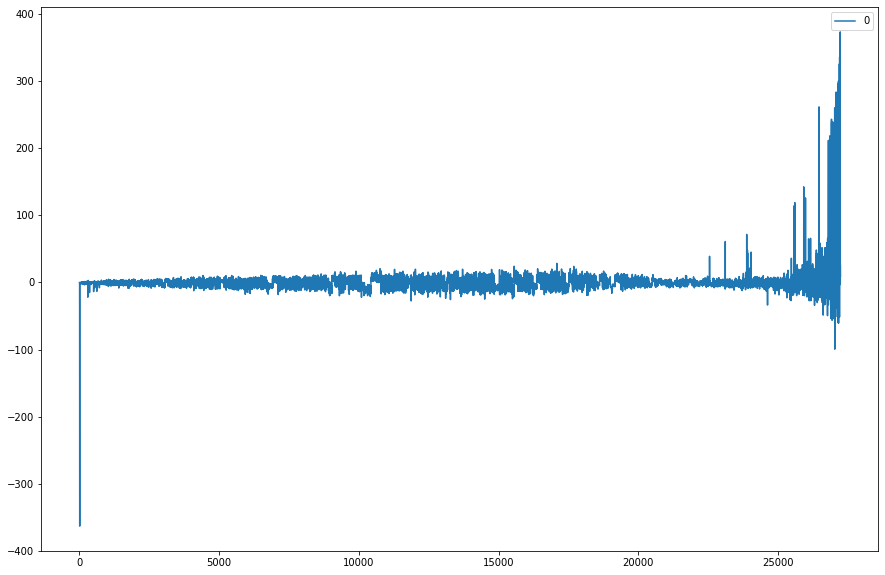

In [ ]:
a= np.array(botTopML)
b = (a[:,1]) - (a[:,0])
diferencas = pd.DataFrame(b)
diferencas = diferencas.reset_index()
diferencas = diferencas.drop(['index'], axis = 1)
diferencas = diferencas
diferencas.plot(figsize = (15,10))

In [ ]:
vetorSoUmaErrada = np.zeros((45,45),dtype=np.int64)
vetorSoUmaCerta = np.zeros((45,45),dtype=np.int64)

for i in range(len(vetorSoUmaCerta)):
  for j in range(len(vetorSoUmaCerta[i])):
    if i == j : 
      vetorSoUmaCerta[i][j] = 1

for i in range(len(vetorSoUmaErrada)):
  for j in range(len(vetorSoUmaErrada[i])):
    if i != j : 
      vetorSoUmaErrada[i][j] = 1

print(vetorSoUmaCerta)
print(vetorSoUmaErrada)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]


In [ ]:
dfUmaErrada = pd.DataFrame(vetorSoUmaErrada)
valorQE = MLPC.predict(dfUmaErrada).tolist()
valorQE.index(min(valorQE))
dfTESTE = pd.DataFrame(valorQE)
prova_mat = prova[prova['CO_PROVA'].notnull()] 
prova_mat = prova_mat[prova_mat['CO_PROVA']==515]
prova_mat = prova_mat['CO_HABILIDADE']
prova_mat = prova_mat.rename_axis('index').reset_index()
dfTESTE = pd.concat([dfTESTE, prova_mat], axis=1, ignore_index=True)
dfTESTE = dfTESTE.drop(1, axis = 1)
dfTESTE = dfTESTE.sort_values(by= 0, ascending=True)
dfTESTE = dfTESTE.rename(columns = {0: 'Nota_ML', 2: 'CO_HABILIDADE'}, inplace = False)
dfTESTE

,Nota_ML,CO_HABILIDADE
32,844,19
37,904,28
0,918,6
42,918,25
39,918,8
35,918,2
28,918,13
26,918,10
24,918,28
20,918,3
